<a href="https://colab.research.google.com/github/EddyGiusepe/Pytorch_Deep_Learning/blob/main/MNIST_com_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Rede Neural com Pytorch</h2>



Data sientist.: Dr.Eddy Giusepe Chirinos Isidro

## Importamos as nossas Bibliotecas

In [1]:
import torch
import torch.nn as nn
import torchvision
#import torchvision as transforms
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import datasets, transforms


In [2]:
# Configuração de sistema para processamento em GPU

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Usamos CUDA ou seja GPU
device

device(type='cuda')

* Nos dígitos só temos duas cores: Preto ou Branco. Ou seja não temos RGB. Aqui só temos um canal $-->$ ($1$x$28$x$28$). 

* Com RGB teríamos três canais $-->$ ($3$x$28$x$28$).

* Escala de pixeis $-->$ $0$ - $255$. Isso é transformado para escala de $0$ - $1$.

* Flatten na Imagem $-->$ $1$x$28$x$28$ = $784$



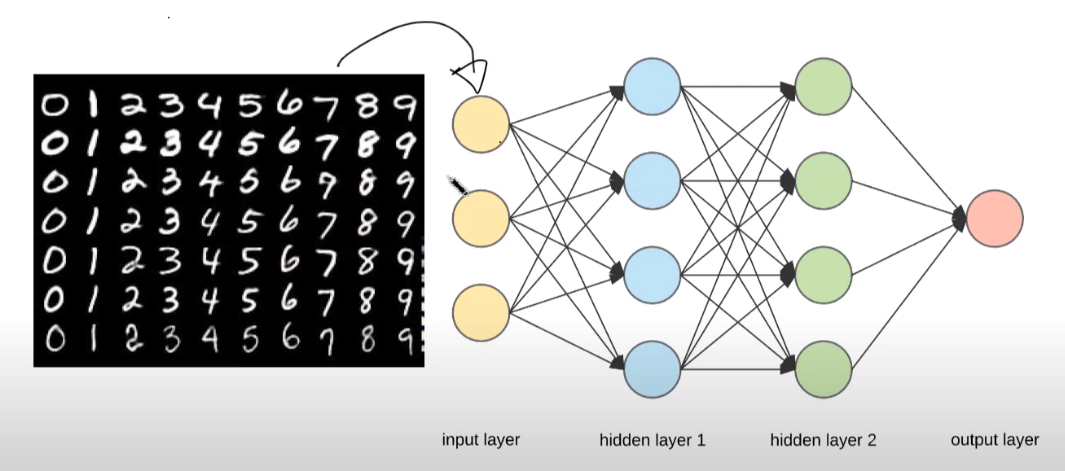

Mudamos os Rótulos, assim:

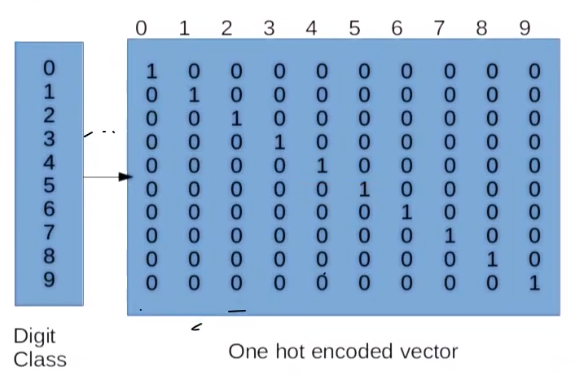

## Nossos Dados

In [4]:
# Hyperparametros

input_size = 784 # 1x28x28
hidden_size1 = 128
hidden_size2 = 64
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001



In [5]:
# Baixamos nossos Dados, para treino e teste.

train_dataset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/1_Pytorch_Deep_Learning/Pytorch_examples/Rede_neural_exemplo_Pytorch/data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/1_Pytorch_Deep_Learning/Pytorch_examples/Rede_neural_exemplo_Pytorch/data', 
                                          train=False, 
                                          transform=transforms.ToTensor())


In [6]:
# Carregamos nossos Dados com: Dataloader

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


In [7]:
type(train_loader), type(test_loader)

(torch.utils.data.dataloader.DataLoader,
 torch.utils.data.dataloader.DataLoader)

In [13]:
dado = iter(train_loader)

dado_images, dado_labels = dado.next()

In [14]:
dado_images.shape

torch.Size([100, 1, 28, 28])

In [15]:
# Visualizando nossos Dados

examples = iter(test_loader)

example_dado, example_rotulo = examples.next()

In [16]:
example_dado.shape

torch.Size([100, 1, 28, 28])

In [17]:
example_dado[0]; # Formado por vários zeros (parte preta de nossa imagem)

In [18]:
# Podemos ver o rótulo, assim:

example_rotulo[0] # --> número 7

tensor(7)

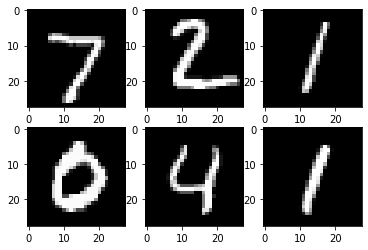

In [19]:
# Vamos visualizar num gráfico

for i in range(6):
  plt.subplot(2, 3, i + 1)
  plt.imshow(example_dado[i][0], cmap='gray') # Tem que ser "gray" porque as cores originais são "preto" e branco

## Criamos a nossa Rede Neural  Conectada com dois Layers ocultos

In [20]:
class RedeNeural(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(RedeNeural, self).__init__()

        self.input_size = input_size
        self.hidden_size1 = nn.Linear(input_size, hidden_size1)
        self.hidden_size2 = nn.Linear(hidden_size1, hidden_size2) 
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size2, num_classes)  
    
    def forward(self, x):
        layer1 = self.hidden_size1(x)
        hidden1 = self.relu(layer1)
        hidden1 = hidden_size2(hidden1)
        hidden2 = self.relu(hidden1)
        out = self.output(hidden2)

        return out
        

   

In [21]:
# Nosso modelo

model = RedeNeural(input_size, hidden_size1, hidden_size2, num_classes).to(device)  

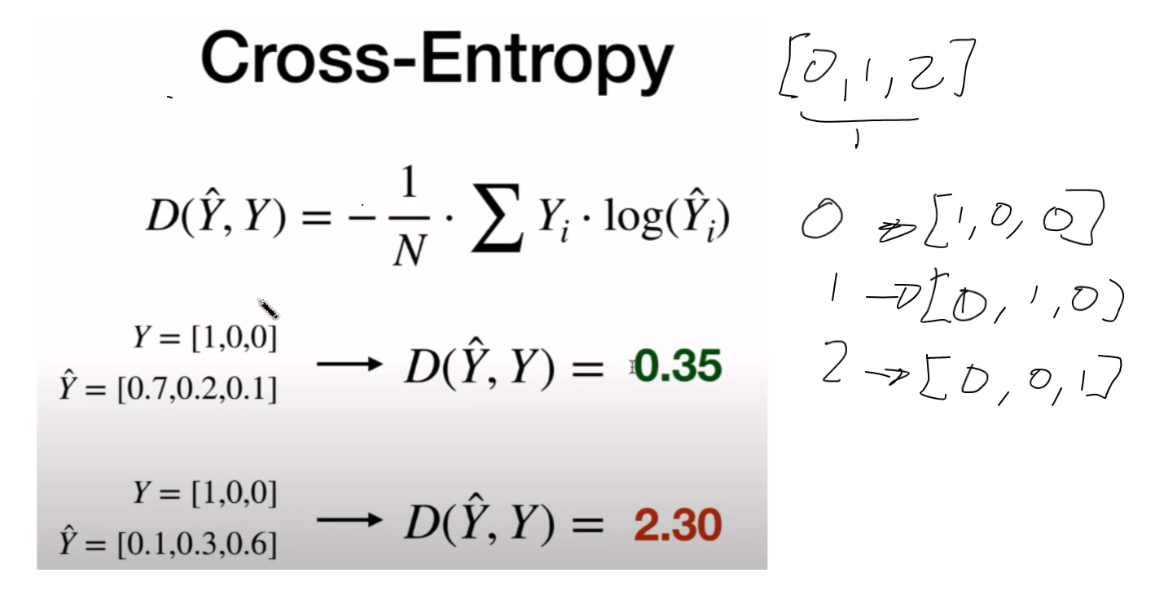

## Loss Optimização

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


## Treinando nosso Modelo

In [39]:
# Link de estudo: https://www.youtube.com/watch?v=biilkqjgg_o&list=PLVZlSIIsZ1ruW7wgzSTxhwX1xLJd16r0x&index=5

n_total_steps = 2 # len(train_loader)
num_epochs = 2

for epoch in range(num_epochs):
  for imagens, rotulos in train_loader:

        # formato original: [100, 1, 28, 28]
        # alteracao de formato vetores: [100, 784]
    imagens = imagens.reshape(-1, 28*28).to(device)

    rotulos = rotulos.to(device)
        
        # Fazendo previsoes com os pesos atuais 
	# e comparando com resultados esperados
    previsao = model(imagens)
    loss = criterion(previsao, rotulos)
        
        # Voltando pela rede neural e optimizando
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
    if (i+1) % 100 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

TypeError: ignored